In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Cleaned.csv')

In [4]:
data

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Feature Engineering

In [5]:
for cols in data.columns:
    if data[f'{cols}'].dtype == 'int64':
        data = data.drop(columns=cols)

In [6]:
data_ = data.corr()
data_

,FFMC,DMC,DC,ISI,temp,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.227116,0.069491,0.097844
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,0.012317,-0.007366,1.000000


<Axes: >

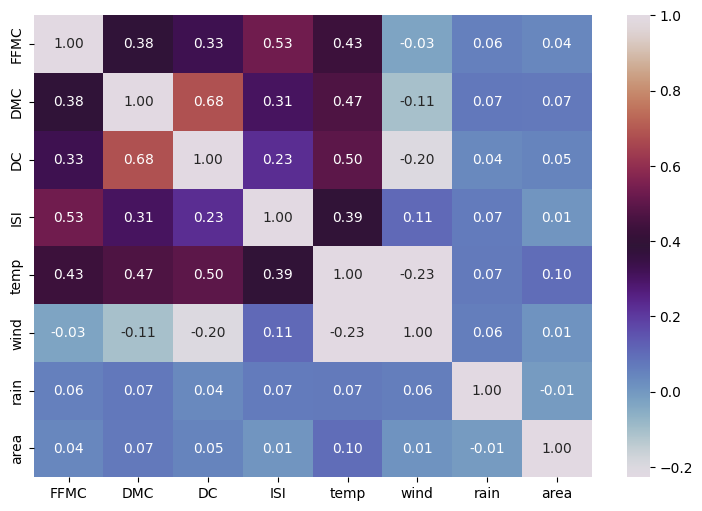

In [7]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_, annot=True, cmap='twilight', fmt=".2f")

Dựa vào ma trận tương quan trên, có thể thấy rằng không có độ tương quan nào lớn hơn 0.8, nên ta sẽ bỏ một trong hai đặc trưng có độ tương quan lớn nhất 0.68 là của DC và DMC, em chọn bỏ DMC vì độ tương quan của DMC với các đặc trưng khác đa số cao hơn so với của DC.

In [8]:
import numpy as np

upper = data_.where(np.triu(np.ones(data_.shape), k=1).astype(bool))
drop = [column for column in upper.columns if any(upper[column] >= 0.68)]
data = data.drop(columns=drop)

## Model

In [9]:
class LinearRegression:
    def __init__(self):
        self.weight = None
    
    def fit(self, X, y):
        first = np.dot(X.T, X)
        invert_mat = np.linalg.inv(first)
        self.weight = (invert_mat @ X.T) @ y 

    def delta(self, y, y_hat):
        return y - y_hat
    
    def rmse(self, y, y_hat):
        return np.sqrt(np.mean(self.delta(y, y_hat) ** 2))
    
    def predict(self, X):
        return np.dot(self.weight.T, X.T)

In [10]:
X_train, X_test  = np.array_split(data, [int(0.8 * len(data))])

c:\Users\ply58\anaconda3\envs\machinelearning\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
y_train = X_train['area']
y_test = X_test['area']
X_train = X_train.drop(columns='area')
X_test = X_test.drop(columns='area')

## Training

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [13]:
for w in lr.weight:
    print(f"{w:.20f}")

-0.06857224598136223148
0.07157681202401773579
-0.84387669978395496440
0.82828653735759893983
0.72790566484960983473
-18.86667416131702168514


In [14]:
print(f"{lr.rmse(y_test, predictions):.20f}")

80.25915297600987230453
